In [40]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import NullFormatter  , ScalarFormatter
import matplotlib.axes as ax
import numpy as np
import statistics as st


threads = 2
num_client_machines = 3
connections_per_thread = [1, 8, 16, 22, 28, 32, 40, 50 ]
clients21 = []

for c in connections_per_thread:
    clients21.append(c*threads*num_client_machines)

    
threads = 2 #Come se fossero le instances
num_client_machines = 1
connections_per_thread = [1, 8, 16, 22, 28, 32, 40, 50, 60, 100 ]
clients22 = []

for c in connections_per_thread:
    clients22.append(c*threads*num_client_machines)



In [41]:
def conv(array_string):
    new = np.zeros((len(array_string)))
    for i in range(0,len(array_string),1):
        new[i] = float(array_string[i])
    return new    

In [42]:
with open('./Write_Only_DataExp21.csv', 'rb') as csvfile:
    i = 0
    reader = csv.reader(csvfile)
    for row in reader:
        if(i==0):
            WO21allClients_throughput_means = conv(row)
        elif(i==1):
            WO21allClients_throughput_std = conv(row)
        elif(i==2):
            WO21allClients_IDEAL_throughput_means = conv(row)
        elif(i==3):
            WO21allClients_IDEAL_throughput_std = conv(row)
        elif(i==4):
            WO21allClients_WEIGHTED_latencies_mean = conv(row)
        elif(i==5):
            WO21allClients_WEIGHTED_latencies_std = conv(row)
        elif(i==6):
            WO21allClients_WEIGHTED_IDEAL_latencies_mean = conv(row)
        else:
            WO21allClients_WEIGHTED_IDEAL_latencies_std = conv(row)
        i += 1

        

In [43]:

with open('./Read_Only_DataExp21.csv', 'rb') as csvfile:
    i = 0
    reader = csv.reader(csvfile)
    for row in reader:
        if(i==0):
            RO21allClients_throughput_means = conv(row)
        elif(i==1):
            RO21allClients_throughput_std = conv(row)
        elif(i==2):
            RO21allClients_IDEAL_throughput_means = conv(row)
        elif(i==3):
            RO21allClients_IDEAL_throughput_std = conv(row)
        elif(i==4):
            RO21allClients_WEIGHTED_latencies_mean = conv(row)
        elif(i==5):
            RO21allClients_WEIGHTED_latencies_std = conv(row)
        elif(i==6):
            RO21allClients_WEIGHTED_IDEAL_latencies_mean = conv(row)
        else:
            RO21allClients_WEIGHTED_IDEAL_latencies_std = conv(row)
        i += 1

        


In [44]:
with open('./Write_Only_DataExp22.csv', 'rb') as csvfile:
    i = 0
    reader = csv.reader(csvfile)
    for row in reader:
        if(i==0):
            WO22allInstances_c1_throughput_means = conv(row)
        elif(i==1):
            WO22allInstances_c1_throughput_std = conv(row)
        elif(i==2):
            WO22allInstances_c1_IDEAL_throughput_means = conv(row)
        elif(i==3):
            WO22allInstances_c1_IDEAL_throughput_std = conv(row)
        elif(i==4):
            WO22allInstances_WEIGHTED_latencies_mean = conv(row)
        elif(i==5):
            WO22allInstances_WEIGHTED_latencies_std = conv(row)
        elif(i==6):
            WO22allInstances_WEIGHTED_IDEAL_latencies_mean = conv(row)
        elif(i==7):
            WO22allInstances_WEIGHTED_IDEAL_latencies_std = conv(row)
        i += 1

        

In [45]:
with open('./Read_Only_DataExp22.csv', 'rb') as csvfile:
    i = 0
    reader = csv.reader(csvfile)
    for row in reader:
        if(i==0):
            RO22allInstances_c1_throughput_means = conv(row)
        elif(i==1):
            RO22allInstances_c1_throughput_std = conv(row)
        elif(i==2):
            RO22allInstances_c1_IDEAL_throughput_means = conv(row)
        elif(i==3):
            RO22allInstances_c1_IDEAL_throughput_std = conv(row)
        elif(i==4):
            RO22allInstances_WEIGHTED_latencies_mean = conv(row)
        elif(i==5):
            RO22allInstances_WEIGHTED_latencies_std = conv(row)
        elif(i==6):
            RO22allInstances_WEIGHTED_IDEAL_latencies_mean = conv(row)
        elif(i==7):
            RO22allInstances_WEIGHTED_IDEAL_latencies_std = conv(row)
        i += 1

## Comparison between the two Experiments

In [46]:
print("Clients 2.1: "+str(len(clients21)))
print("Clients 2.2: "+str(len(clients22)))

print("Exp 2.1: "+str(len(WO21allClients_throughput_means)))
print("Exp 2.2: "+str(len(WO22allInstances_c1_throughput_means)))

Clients 2.1: 8
Clients 2.2: 10
Exp 2.1: 8
Exp 2.2: 10


In [47]:
clients21

[6, 48, 96, 132, 168, 192, 240, 300]

In [48]:
clients22

[2, 16, 32, 44, 56, 64, 80, 100, 120, 200]

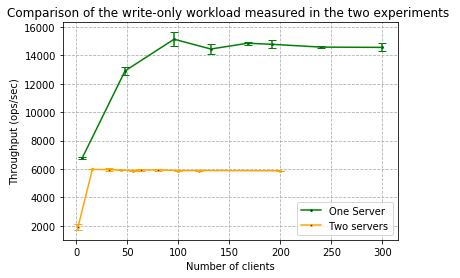

In [49]:
#USE clients
fig, ax_lst = plt.subplots(1, 1) 
plt.xlabel('Number of clients')
plt.ylabel('Throughput (ops/sec)')
plt.title("Comparison of the write-only workload measured in the two experiments ")
plt.grid('true', axis='both', fillstyle='left', linestyle='dashed',clip_on='true')
line_c1, = plt.plot(clients21, WO21allClients_throughput_means, color='green', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_c2, = plt.plot(clients22, WO22allInstances_c1_throughput_means, color='orange', linestyle='solid', marker='o', markerfacecolor='black',markersize=2 )

ax_lst.errorbar(clients21,WO21allClients_throughput_means, yerr=WO21allClients_throughput_std, fmt=None, ecolor='green', capthick=1, capsize=4)
ax_lst.errorbar(clients22,WO22allInstances_c1_throughput_means, yerr=WO22allInstances_c1_throughput_std, fmt=None, ecolor='orange', capthick=1, capsize=4)
#ax_lst.set_xlim(0, 600)


plt.legend([ line_c1, line_c2 ], ['One Server','Two servers'])
plt.savefig("Write_Only_ThroughputforExperiments21and22.png", bbox_inches='tight')

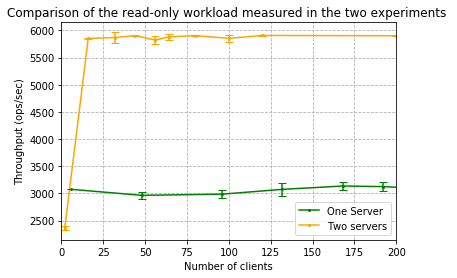

In [53]:
#USE clients
fig, ax_lst = plt.subplots(1, 1) 
plt.xlabel('Number of clients')
plt.ylabel('Throughput (ops/sec)')
plt.title("Comparison of the read-only workload measured in the two experiments ")
plt.grid('true', axis='both', fillstyle='left', linestyle='dashed',clip_on='true')
line_c1, = plt.plot(clients21, RO21allClients_throughput_means, color='green', linestyle='solid', marker='o',markerfacecolor='green', markersize=2)
line_c2, = plt.plot(clients22, RO22allInstances_c1_throughput_means, color='orange', linestyle='solid', marker='o', markerfacecolor='orange',markersize=2 )

ax_lst.errorbar(clients21,RO21allClients_throughput_means, yerr=RO21allClients_throughput_std, fmt=None, ecolor='green', capthick=1, capsize=4)
ax_lst.errorbar(clients22,RO22allInstances_c1_throughput_means, yerr=RO22allInstances_c1_throughput_std, fmt=None, ecolor='orange', capthick=1, capsize=4)


ax_lst.set_xlim(0, 200)


plt.legend([ line_c1, line_c2 ], ['One Server','Two servers'])
plt.savefig("Read_Only_ThroughputforExperiments21and22.png", bbox_inches='tight')

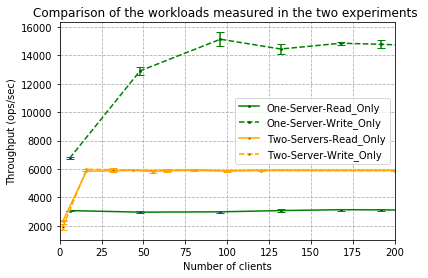

In [54]:
#USE clients
fig, ax_lst = plt.subplots(1, 1) 
plt.xlabel('Number of clients')
plt.ylabel('Throughput (ops/sec)')
plt.title("Comparison of the workloads measured in the two experiments ")
plt.grid('true', axis='both', fillstyle='left', linestyle='dashed',clip_on='true')
line_c1, = plt.plot(clients21, RO21allClients_throughput_means, color='green', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_c2, = plt.plot(clients21, WO21allClients_throughput_means, color='green', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=2)
ax_lst.errorbar(clients21,RO21allClients_throughput_means, yerr=RO21allClients_throughput_std, fmt=None, ecolor='green', capthick=1, capsize=4)
ax_lst.errorbar(clients21,WO21allClients_throughput_means, yerr=WO21allClients_throughput_std, fmt=None, ecolor='green', capthick=1, capsize=4)


line_c3, = plt.plot(clients22, RO22allInstances_c1_throughput_means, color='orange', linestyle='solid', marker='o', markerfacecolor='black',markersize=2 )
line_c4, = plt.plot(clients22, WO22allInstances_c1_throughput_means, color='orange', linestyle='dashed', marker='o', markerfacecolor='black',markersize=2 )
ax_lst.errorbar(clients22,RO22allInstances_c1_throughput_means, yerr=RO22allInstances_c1_throughput_std, fmt=None, ecolor='orange', capthick=1, capsize=4)
ax_lst.errorbar(clients22,WO22allInstances_c1_throughput_means, yerr=WO22allInstances_c1_throughput_std, fmt=None, ecolor='orange', capthick=1, capsize=4)

#plt.xticks([2, 6, 16, 32, 44, 48,  56, 64, 80, 96,  100, 120, 132, 168, 192, 200, 240, 300])
ax_lst.set_xlim(0, 200)
plt.legend([ line_c1, line_c2, line_c3, line_c4 ], ['One-Server-Read_Only','One-Server-Write_Only',
                                                    'Two-Servers-Read_Only','Two-Server-Write_Only' ])


plt.savefig("ThroughputforExperiments21and22.png", bbox_inches='tight')

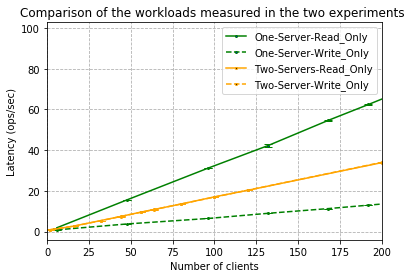

In [58]:
#USE clients
fig, ax_lst = plt.subplots(1, 1) 
plt.xlabel('Number of clients')
plt.ylabel('Latency (ops/sec)')
plt.title("Comparison of the workloads measured in the two experiments ")
plt.grid('true', axis='both', fillstyle='left', linestyle='dashed',clip_on='true')
line_c1, = plt.plot(clients21, RO21allClients_WEIGHTED_latencies_mean, color='green', linestyle='solid', marker='o',markerfacecolor='blue', markersize=2)
line_c2, = plt.plot(clients21, WO21allClients_WEIGHTED_latencies_mean, color='green', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=2)
ax_lst.errorbar(clients21,RO21allClients_WEIGHTED_latencies_mean, yerr=RO21allClients_WEIGHTED_latencies_std, fmt=None, ecolor='green', capthick=1, capsize=4)
ax_lst.errorbar(clients21,WO21allClients_WEIGHTED_latencies_mean, yerr=WO21allClients_WEIGHTED_latencies_std, fmt=None, ecolor='green', capthick=1, capsize=4)

line_c3, = plt.plot(clients22, RO22allInstances_WEIGHTED_latencies_mean, color='orange', linestyle='solid', marker='o', markerfacecolor='black',markersize=2 )
line_c4, = plt.plot(clients22, WO22allInstances_WEIGHTED_latencies_mean, color='orange', linestyle='dashed', marker='o', markerfacecolor='black',markersize=2 )
ax_lst.errorbar(clients22,RO22allInstances_WEIGHTED_latencies_mean, yerr=RO22allInstances_WEIGHTED_latencies_std, fmt=None, ecolor='orange', capthick=1, capsize=4)
ax_lst.errorbar(clients22,WO22allInstances_WEIGHTED_latencies_mean, yerr=WO22allInstances_WEIGHTED_latencies_std, fmt=None, ecolor='orange', capthick=1, capsize=4)

#plt.xticks([2, 6, 16, 32, 44, 48,  56, 64, 80, 96,  100, 120, 132, 168, 192, 200, 240, 300])
ax_lst.set_xlim(0, 200)

plt.legend([ line_c1, line_c2, line_c3, line_c4 ], ['One-Server-Read_Only','One-Server-Write_Only',
                                                    'Two-Servers-Read_Only','Two-Server-Write_Only' ])

plt.savefig("LatenciesforExperiments21and22.png", bbox_inches='tight')